# 3장 불균형데이터 (Imbalanced Data)
## 손실함수, smote

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

In [2]:
from IPython.display import Image
width = 800; height = 600

## 데이터불러오기

In [3]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X.head()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((4000, 78), (4000,))

,성별_1,성별_2,지역_1,지역_2,지역_3,지역_4,지역_5,지역_6,지역_7,직업_1,...,드라마_genre_7,드라마_genre_8,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_13,드라마_genre_14,드라마_genre_15,드라마_genre_16
0,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.9375,0.875,0.0000,0.000,0.8125,0.0000,0.0,0.0
1,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.8750,0.000,0.0000,0.0000,0.0,0.0
2,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.875,0.0000,0.8125,0.0,0.0
3,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0
4,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0000,0.875,0.8125,0.000,0.0000,0.0000,0.0,0.0


((3200, 78), (800, 78))

((3200,), (800,))

## 1. 손실함수 조정

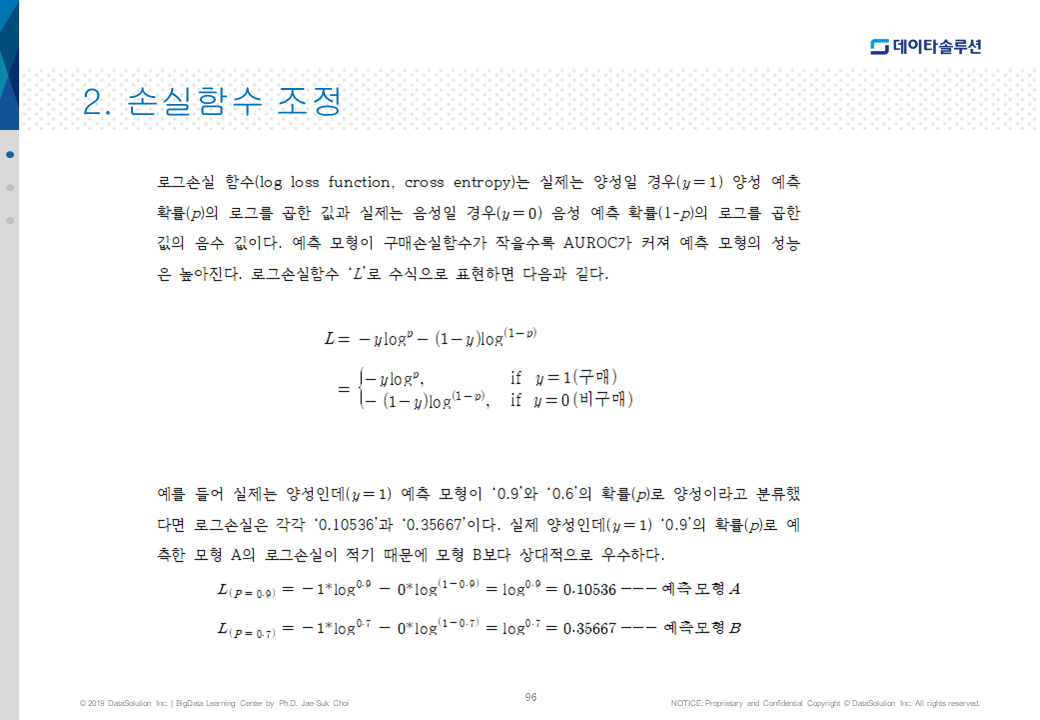

In [4]:
Image(filename='../img/슬라이드96.png', width=width, height=height)

## before 손실함수

In [5]:
import glob, os
os.chdir('../output/')
glob.glob('*.joblib')

['dt.joblib',
 'gnb.joblib',
 'Gradient Boosting.joblib',
 'knn.joblib',
 'lgr.joblib',
 'Random Forest.joblib',
 'svc.joblib']

In [6]:
model_dict = {}
for file in glob.glob('*.joblib'):
    model_dict[file.split('.')[0]] = load(file)
model_dict.keys()

dict_keys(['dt', 'gnb', 'Gradient Boosting', 'knn', 'lgr', 'Random Forest', 'svc'])

In [7]:
model_dict['lgr']

LogisticRegression(C=1.623776739188721, random_state=11)

In [8]:
from sklearn.linear_model import LogisticRegression
model = model_dict['lgr']
y_predict = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       522
           1       0.52      0.28      0.37       278

    accuracy                           0.66       800
   macro avg       0.60      0.57      0.57       800
weighted avg       0.63      0.66      0.63       800



In [9]:
model = LogisticRegression(random_state=11, class_weight='balanced')
y_predict = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       522
           1       0.47      0.61      0.53       278

    accuracy                           0.62       800
   macro avg       0.61      0.62      0.61       800
weighted avg       0.65      0.62      0.63       800



In [10]:
y.value_counts(normalize=True)
major = y.value_counts(normalize=True)[0]
minor = y.value_counts(normalize=True)[1]

0    0.65275
1    0.34725
Name: 구매, dtype: float64

In [11]:
model = LogisticRegression(random_state=11, class_weight={0: minor, 1: major})
y_predict = model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       522
           1       0.47      0.60      0.53       278

    accuracy                           0.62       800
   macro avg       0.61      0.62      0.61       800
weighted avg       0.65      0.62      0.63       800



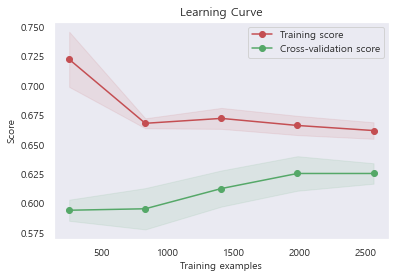

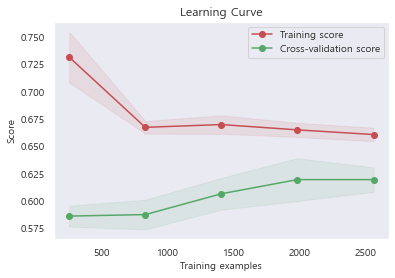

In [12]:
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='accuracy')
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring='recall_macro')

# smote

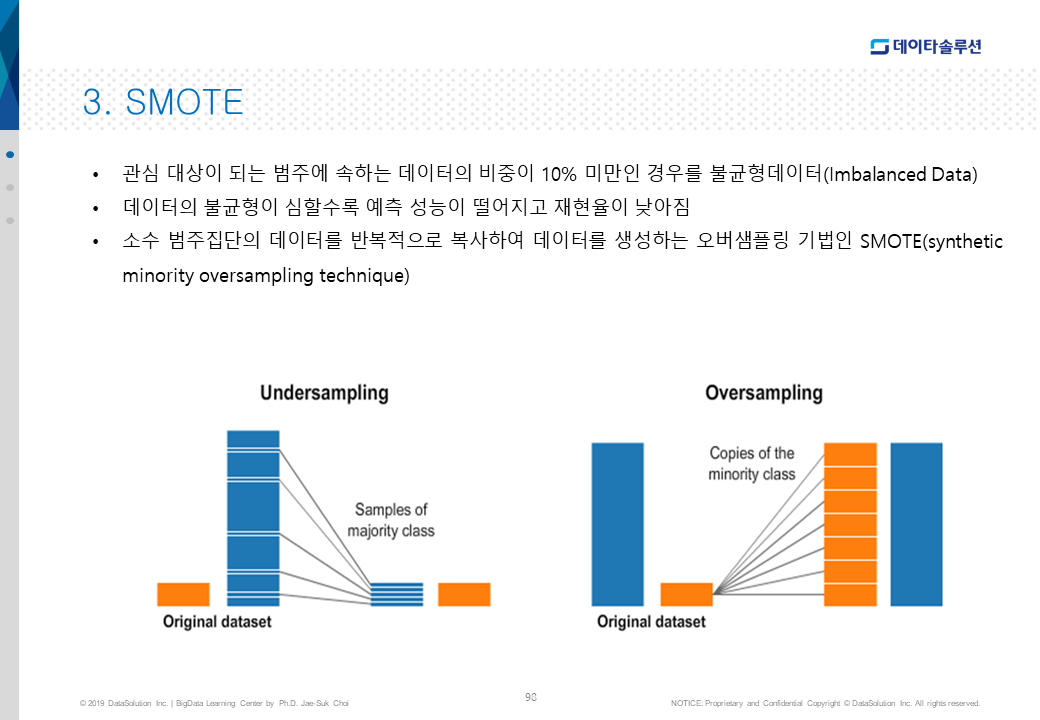

In [13]:
Image(filename='../img/슬라이드98.png', width=width, height=height)

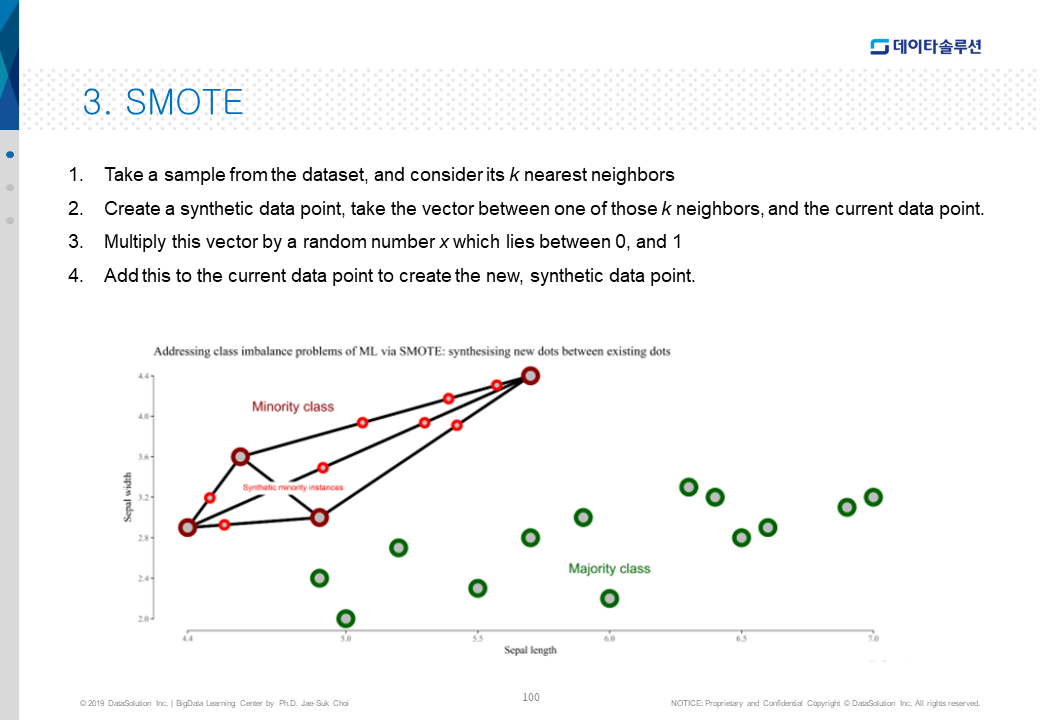

In [14]:
Image(filename='../img/슬라이드100.png', width=width, height=height)

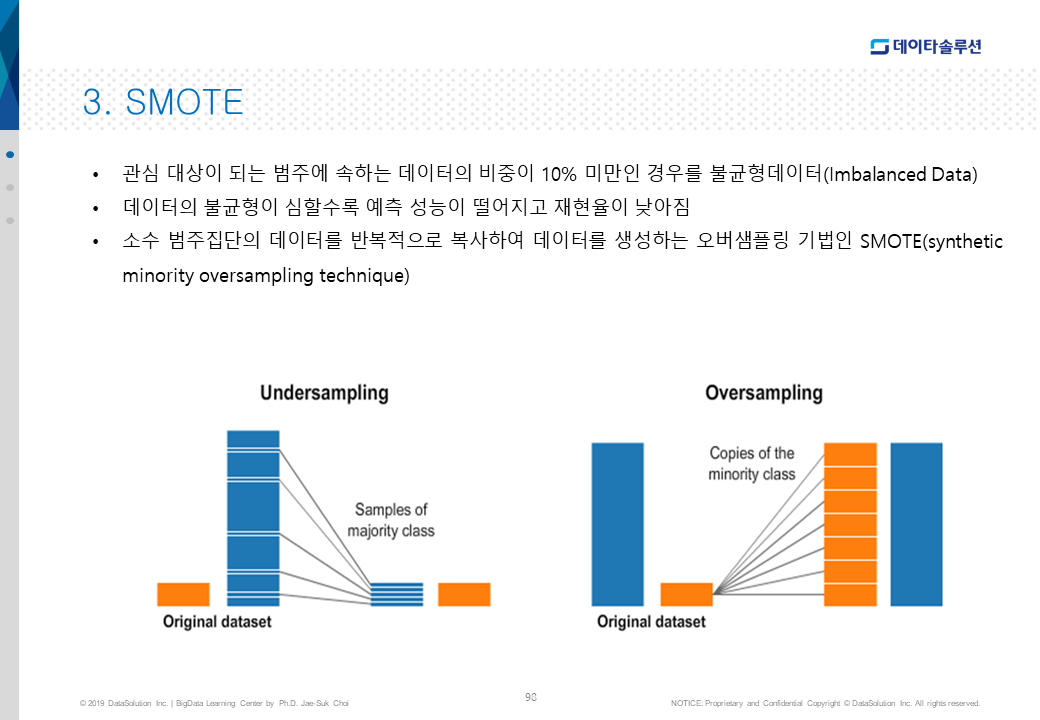

In [15]:
Image(filename='../img/슬라이드98.png', width=width, height=height)

In [16]:
! pip install imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE # pip install imbalearn

In [17]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X.shape, y.shape
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train.value_counts(normalize=True)*100

((4000, 78), (4000,))

((3200, 78), (800, 78), (3200,), (800,))

0    65.28125
1    34.71875
Name: 구매, dtype: float64

In [18]:
sm = SMOTE(sampling_strategy = 0.6, random_state=10)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape
y_train_smote.value_counts(normalize=True)*100

((3342, 78), (3342,))

0    62.507481
1    37.492519
Name: 구매, dtype: float64

In [19]:
sm = SMOTE(random_state=10)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
X_train.shape, X_train_smote.shape
y_train_smote.value_counts(normalize=True)*100

((3200, 78), (4178, 78))

1    50.0
0    50.0
Name: 구매, dtype: float64

In [20]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=11)

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(random_state=13))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall_macro', cv=kf)

array([0.60623829, 0.62150594, 0.62311126, 0.63363591, 0.60947516])

In [21]:
imba_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [22]:
param = {
    'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(10, 100, 10)],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__max_depth': [int(x) for x in np.linspace(5, 20, 10)],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False]
}

In [23]:
kf = KFold(n_splits=3)
rs = RandomizedSearchCV(imba_pipeline, param_distributions= param, cv=kf,
                        n_iter=50, 
                        scoring='recall_macro', verbose=True)
y_predict = rs.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   45.4s finished


              precision    recall  f1-score   support

           0       0.74      0.86      0.79       522
           1       0.61      0.42      0.50       278

    accuracy                           0.71       800
   macro avg       0.67      0.64      0.65       800
weighted avg       0.69      0.71      0.69       800



## 4. 성능 지표

In [24]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier) 
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier)

# metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, precision_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, recall_score, log_loss, brier_score_loss

In [25]:
classifiers = {}
classifiers.update({'KNN': KNeighborsClassifier()})
classifiers.update({'GNB': GaussianNB()})
classifiers.update({'LGR': LogisticRegression(class_weight='balanced')})
classifiers.update({'Decisiontree': DecisionTreeClassifier(class_weight='balanced')})
classifiers.update({'Bagging': BaggingClassifier(DecisionTreeClassifier(),
                                                 n_estimators=100)})
classifiers.update({'Random Forest': RandomForestClassifier(class_weight='balanced',
                                                            n_estimators=100)})
classifiers.update({'AdaBoost': AdaBoostClassifier(n_estimators=100)})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier(n_estimators=100,
                                                                    max_depth=2)})

In [26]:
kf = KFold(n_splits=3)
results = {}
for classifier_label, classifier in classifiers.items():
    steps = [('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = {}
    
    gs = RandomizedSearchCV(pipeline, param_grid, cv = kf,
                          n_iter = 2,
                          scoring = 'f1_macro')  
    y_pred = gs.fit(X_train, y_train).predict(X_test)
    y_proba = gs.predict_proba(X_test)
    y_score = y_proba[:,1]
    
    result = {'Best Parameters': gs.best_params_,
              'Training recall_macro': gs.best_score_,
              'Test recall_macro': recall_score(y_test, y_pred, average='macro'),
              'AUROC': roc_auc_score(y_test, y_score),
              'Average PR': average_precision_score(y_test, y_score),
              'F1-score': f1_score(y_test, y_pred),
              'Accuracy': cross_val_score(gs, X_train, y_train).mean(),
              'Log_loss': log_loss(y_test, y_proba),
              'Brier_score': brier_score_loss(y_test, y_score)
             }
 
    results.update({classifier_label: result})

In [27]:
pd.DataFrame(results).T.drop(['Best Parameters'], axis=1).sort_values('Log_loss')

,Training recall_macro,Test recall_macro,AUROC,Average PR,F1-score,Accuracy,Log_loss,Brier_score
Random Forest,0.595021,0.610477,0.710907,0.593396,0.405128,0.598152,0.579822,0.196506
Bagging,0.625914,0.646841,0.7113,0.586545,0.501119,0.622998,0.582634,0.197357
Gradient Boosting,0.573838,0.593353,0.676679,0.546296,0.385185,0.573783,0.599681,0.205404
LGR,0.605864,0.619091,0.643878,0.481564,0.528125,0.604516,0.668103,0.236556
AdaBoost,0.585316,0.592436,0.653822,0.515425,0.415929,0.58755,0.690239,0.24855
KNN,0.589808,0.608741,0.663207,0.490293,0.445415,0.596298,1.61548,0.22
GNB,0.325994,0.502853,0.627911,0.455659,0.513308,0.314022,8.33755,0.630118
Decisiontree,0.57539,0.568201,0.568201,0.386378,0.436036,0.571368,13.5133,0.39125


## 보정곡선

In [28]:
classifier_labels = []
probas_list = []
for classifier_label, classifier in classifiers.items():
    steps = [('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = {}   
    gs = RandomizedSearchCV(pipeline, param_grid, cv = kf,
                          n_iter = 2, scoring = 'f1_micro')  
    y_proba = gs.fit(X_train, y_train).predict_proba(X_test)
    probas_list.append(y_proba)
    classifier_labels.append(classifier_label)

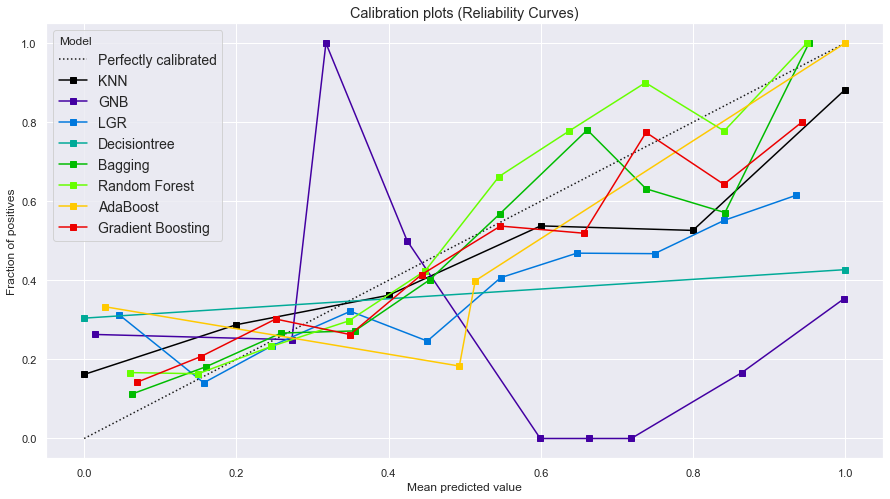

In [29]:
sns.set()
skplt.metrics.plot_calibration_curve(y_test, probas_list, classifier_labels, figsize=(15,8))
leg = plt.legend(title='Model', fontsize = 14)
leg._legend_box.align = 'left'

## Pycaret

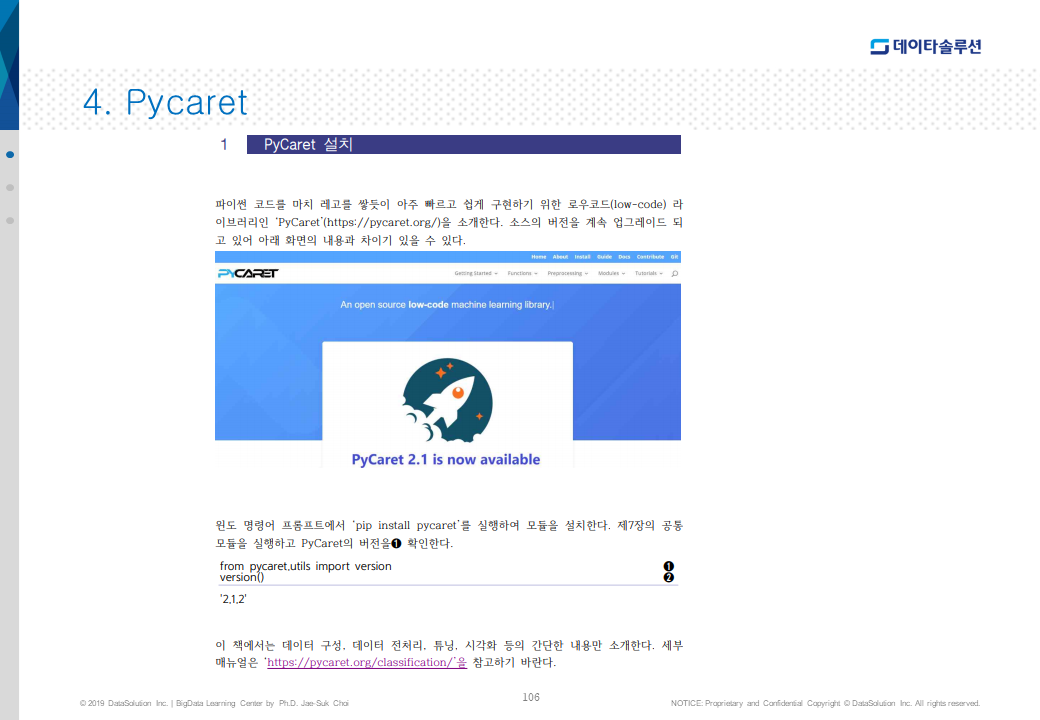

In [31]:
Image(filename='../img/슬라이드106.png', width=width, height=height)

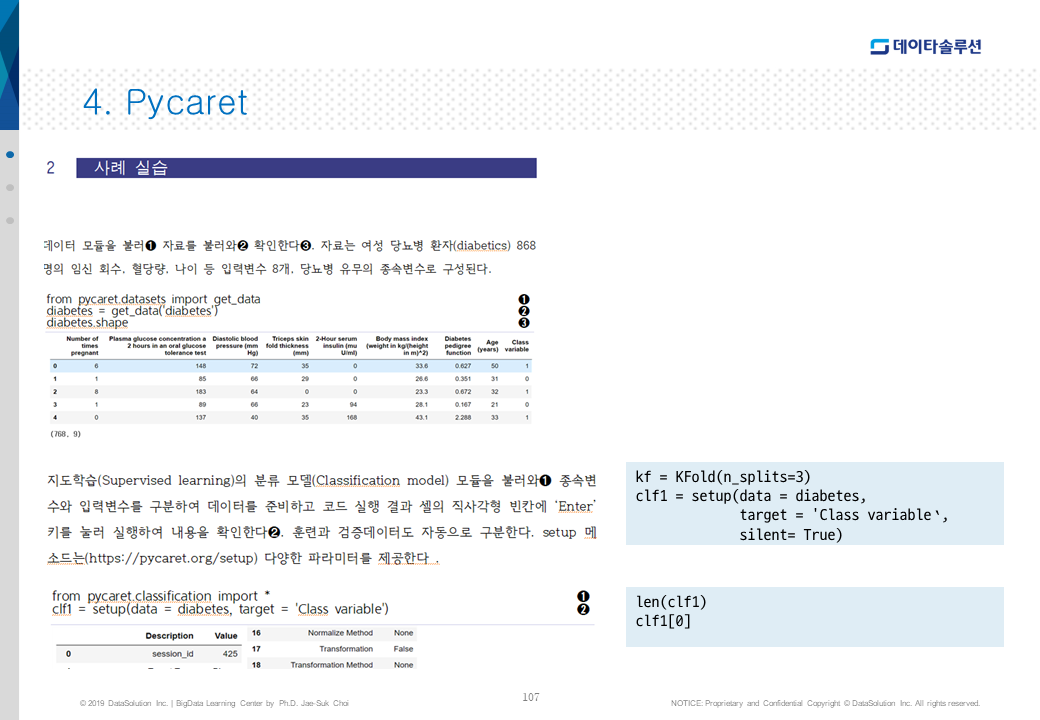

In [32]:
Image(filename='../img/슬라이드107.png', width=width, height=height)

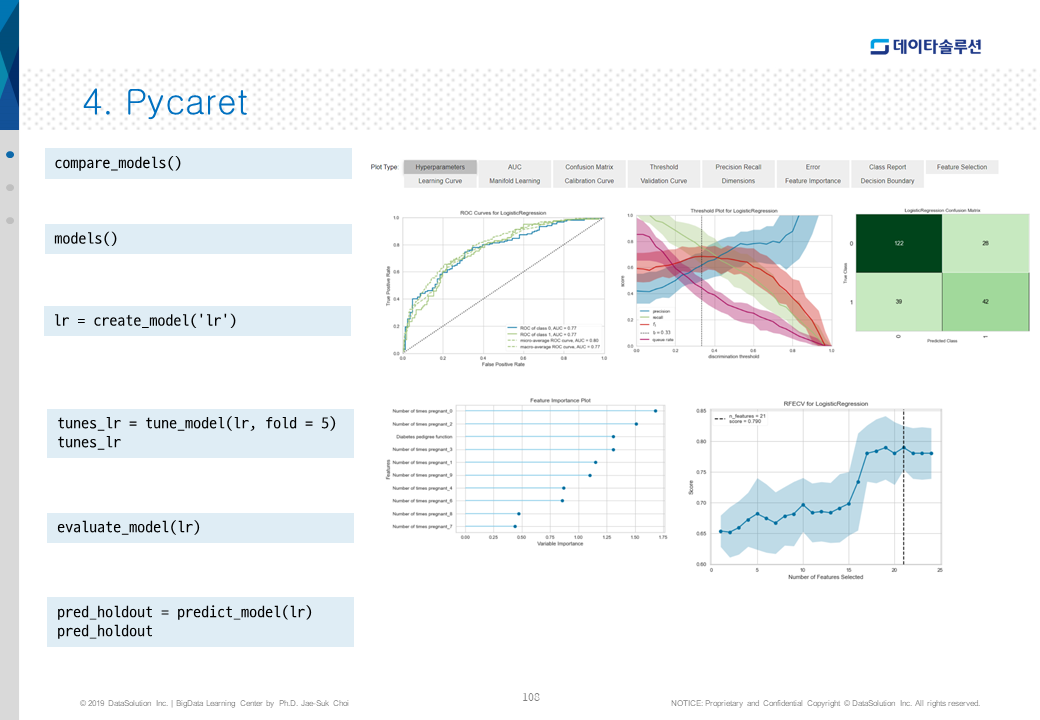

In [33]:
Image(filename='../img/슬라이드108.png', width=width, height=height)

## END